# Лекция 2. Знакомство с библиотеками numpy, pandas и sklearn. Реализация линейной регрессии

## Импорт библиотек

In [23]:
import pandas as pd
import numpy as np

Обычно данные хранятся в файлах '.csv'. Библиотека pandas предлагает метод read_csv для чтения данных из файлов. Данный метод возвращает объект DataFrame

In [24]:
df = pd.read_csv('data.csv')
df

,km,price
0,240000,3650
1,139800,3800
2,150500,4400
3,185530,4450
4,176000,5250
5,114800,5350
6,166800,5800
7,89000,5990
8,144500,5999
9,84000,6200


Объект DataFrame имеет атрибут shape, который возвращает кортеж размера DataFrame (кол-во образцов, кол-во фич)

In [25]:
df.shape

(24, 2)

Столбец DataFrame является объектом Series библиотеки pandas. Объекты из библиотеки можно легко представить в объекты numpy.array, для используется метод to_numpy. Метод reshape изменяет форму массива, -1 означает, что нам не важна размерность по данной оси, метод сам поймет размерность по другим осям.

In [26]:
test_km = df['km'].to_numpy().reshape(-1, 1)
test_km

array([[240000],
       [139800],
       [150500],
       [185530],
       [176000],
       [114800],
       [166800],
       [ 89000],
       [144500],
       [ 84000],
       [ 82029],
       [ 63060],
       [ 74000],
       [ 97500],
       [ 67000],
       [ 76025],
       [ 48235],
       [ 93000],
       [ 60949],
       [ 65674],
       [ 54000],
       [ 68500],
       [ 22899],
       [ 61789]])

Функция ones из библиотеки numpy создает массив из единиц, один из входных параметров это размер массива

In [27]:
test_ones = np.ones((df['km'].shape[0], 1))
test_ones

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

hstack склеивает два numpy array по горизонтали

In [28]:
np.hstack((test_ones, test_km))

array([[1.0000e+00, 2.4000e+05],
       [1.0000e+00, 1.3980e+05],
       [1.0000e+00, 1.5050e+05],
       [1.0000e+00, 1.8553e+05],
       [1.0000e+00, 1.7600e+05],
       [1.0000e+00, 1.1480e+05],
       [1.0000e+00, 1.6680e+05],
       [1.0000e+00, 8.9000e+04],
       [1.0000e+00, 1.4450e+05],
       [1.0000e+00, 8.4000e+04],
       [1.0000e+00, 8.2029e+04],
       [1.0000e+00, 6.3060e+04],
       [1.0000e+00, 7.4000e+04],
       [1.0000e+00, 9.7500e+04],
       [1.0000e+00, 6.7000e+04],
       [1.0000e+00, 7.6025e+04],
       [1.0000e+00, 4.8235e+04],
       [1.0000e+00, 9.3000e+04],
       [1.0000e+00, 6.0949e+04],
       [1.0000e+00, 6.5674e+04],
       [1.0000e+00, 5.4000e+04],
       [1.0000e+00, 6.8500e+04],
       [1.0000e+00, 2.2899e+04],
       [1.0000e+00, 6.1789e+04]])

random.rand создает массив из случайных чисел, принимает на вход размер массива.

.T - транспонирует массив

In [29]:
np.random.rand(1, df.shape[1]).T

array([[0.87738288],
       [0.24350473]])

## Linear regression

Пусть у нас задан датасет $(X, y)$, где $y = (y_{i})^{N}_{i=1} ∈ ℝ^{N}$ – вектор значений целевой переменной, a $X = (x_{i})^{N}_{i=1} ∈ ℝ^{N×D}, x_{i} ∈ ℝ^{D}$ – матрица объекты-признаки, в которой $i$-я строка – это вектор признаков $i$-го объекта выборки. Мы хотим моделировать зависимость $y_{i}$ от $x_{i}$ как линейную функцию со свободным членом. Общий вид такой функции из $ℝ^{D}$ в $ℝ$ выглядит следующим образом:


$f_{ω}(x_{i})=\langle\omega, x_{i}⟩+\omega_{0}$


Свободный член $\omega_{0}$ часто опускают, потому что такого же результата можно добиться, добавив ко всем $x_{i}$ признак, тождественно равный единице; тогда роль свободного члена будет играть соответствующий ему вес:


$\begin{pmatrix}x_{i1} … x_{iD}\end{pmatrix} ⋅ \begin{pmatrix}\omega_{1} \\ \vdots \\ \omega_{D} \end{pmatrix} + \omega_{0} = \begin{pmatrix}1 \ x_{i1} … x_{iD}\end{pmatrix} = \begin{pmatrix}\omega_{0} \\ \omega_{1} \\ \vdots \\ \omega_{D} \end{pmatrix}$


Тогда:


$f_{ω}(x_{i})=\langle\omega, x_{i}⟩$

Мы должны научиться измерять качество модели и минимизировать её ошибку, как-то меняя обучаемые параметры. В нашем примере обучаемые параметры — это веса $ω$. Функция, оценивающая то, как часто модель ошибается, традиционно называется функцией потерь, функционалом качества или просто лоссом (loss function).


Функция потерь $\frac{1}{N}\sum_{i=1}^{N}(y_{i}-\langle x_{i}, ω\rangle)^{2}$ называется Mean Squared Error, MSE или среднеквадратическим отклонением.


Для того, чтобы найти лучшую модель, этот функционал нам надо минимизировать по $\omega$:


$|y-X\omega|^{2}_{2}→\displaystyle \min_{ω}$


### МНК: Аналитическое решение

$y=y_{||}+y_{\perp}$


$y_{||}=X\omega$


$y_{\perp}=y-y_{||}=y-X\omega$


$y_{||}^{T}y_{\perp}=0$


$(X\omega)^{T}(y-X\omega) = 0$

$\omega^{T}X^{T}(y-X\omega)=0$

$X^{T}(y-X\omega)=0$

$X^{T}y-X^{T}X\omega=0$

$X^{T}X\omega=X^{T}y$

$\omega=(X^{T}X)^{-1}X^{T}y$

Вычислительная сложность аналитического решения — $O(N^{2}D+D^{3})$, где $N$ — длина выборки, $D$ — число признаков у одного объекта. Слагаемое $N^{2}D$ отвечает за сложность перемножения матриц $X^{T}$ и $X$, а слагаемое $D^{3}$ — за сложность обращения их произведения. Перемножать матрицы $(X^{T}X)^{-1}$ и $X^{T}$ не стоит. Гораздо лучше сначала умножить $y$ на $X^{T}$, а затем полученный вектор на $(X^{T}X)^{-1}$: так будет быстрее и, кроме того, не нужно будет хранить матрицу $(X^{T}X)^{-1}X^{T}$.


Проблемы «точного» решения


Заметим, что для получения ответа нам нужно обратить матрицу . Это создает множество проблем:

1. Основная проблема в обращении матрицы — это то, что вычислительно обращать большие матрицы дело сложное, а мы бы хотели работать с датасетами, в которых у нас могут быть миллионы точек.

2. Матрица $X^{T}X$, хотя почти всегда обратима в разумных задачах машинного обучения, зачастую плохо обусловлена. Особенно если признаков много, между ними может появляться приближённая линейная зависимость, которую мы можем упустить на этапе формулировки задачи. В подобных случаях погрешность нахождения $\omega$ будет зависеть от квадрата числа обусловленности матрицы $X$, что очень плохо. Это делает полученное таким образом решение численно неустойчивым: малые возмущения $y$ могут приводить к катастрофическим изменениям $\omega$.


### МНК: приближенный численный метод

Минимизируемый функционал является гладким и выпуклым, а это значит, что можно эффективно искать точку его минимума с помощью итеративных градиентных методов. Как известно, градиент функции в точке направлен в сторону её наискорейшего роста, а антиградиент (противоположный градиенту вектор) в сторону наискорейшего убывания. То есть имея какое-то приближение оптимального значения параметра $\omega$, мы можем его улучшить, посчитав градиент функции потерь в точке и немного сдвинув вектор весов в направлении антиградиента:


$\omega_{j} \to \omega_{j}-α\frac{∂}{∂\omega_{j}}L(f_{\omega}, X, y)$

где  – это параметр алгоритма («темп обучения»), который контролирует величину шага в направлении антиградиента. Описанный алгоритм называется **градиентным спуском**.

Посмотрим, как будет выглядеть градиентный спуск для функции потерь $L(f_{\omega}, X, y)=\frac{1}{N}||X\omega-y||^{2}$. Градиент квадрата евклидовой нормы:

$∇_{\omega}L=\frac{2}{N}X^{T}(X\omega-y)$

Cтартовав из какого-то начального приближения, мы можем итеративно уменьшать значение функции, пока не сойдёмся.

Вычислительная сложность градиентного спуска – $O(NDS)$, где, как и выше, $N$ – длина выборки, $D$ – число признаков у одного объекта, $S$ - число итераций.

Сложность по памяти – $O(ND)$ на хранение выборки. В памяти мы держим и выборку, и градиент, но в большинстве реалистичных сценариев доминирует выборка.

### Стохастический градиентный спуск

На каждом шаге градиентного спуска нам требуется выполнить потенциально дорогую операцию вычисления градиента по всей выборке (сложность $O(NDS)$). Возникает идея заменить градиент его оценкой на подвыборке (в английской литературе такую подвыборку обычно именуют batch или mini-batch; в русской разговорной терминологии тоже часто встречается слово батч или мини-батч).

А именно, если функция потерь имеет вид суммы по отдельным парам объект-таргет:

$L(\omega, X, y)=\frac{1}{N}∑^{N}_{i=1}L(ω, x_{i}, y_{i})$,

а градиент, соответственно, записывается в виде:

$∇_{\omega}L(\omega, X, y)=\frac{1}{N}∑^{N}_{i=1} \nabla_{ω} L(ω, x_{i}, y_{i})$,

то предлагается брать оценку:

$∇_{\omega}L(\omega, X, y)\thickapprox\frac{1}{B}∑^{B}_{t=1} \nabla_{ω} L(ω, x_{i_{t}}, y_{i_{t}})$,

для некоторого подмножества этих пар $(x_{i_{t}}, y_{i_{t}})^{B}_{t=1}$. Полный градиент $∇_{\omega}L(\omega, X, y)$ можно воспринимать как среднее градиентов по всем объектам, то есть как оценку матожидания $𝔼\nabla_{ω} L(ω, x, y)$; тогда, конечно, оценка матожидания по меньшей подвыборке тоже будет иметь вид среднего градиентов по объектам этой подвыборки.

Введём ещё один параметр нашего алгоритма: размер батча, который мы обозначим $B$. Теперь на $B$ очередных примерах вычислим градиент и обновим веса модели. При этом вместо количества шагов алгоритма обычно задают количество эпох $E$. Это ещё один гиперпараметр. Одна эпоха – это один полный проход нашего сэмплера по выборке. Заметим, что если выборка очень большая, а модель компактная, то даже первый проход бывает можно не заканчивать.

Сложность по времени – $O(NDE)$.

В целом, разницу между алгоритмами можно представлять как-то так:

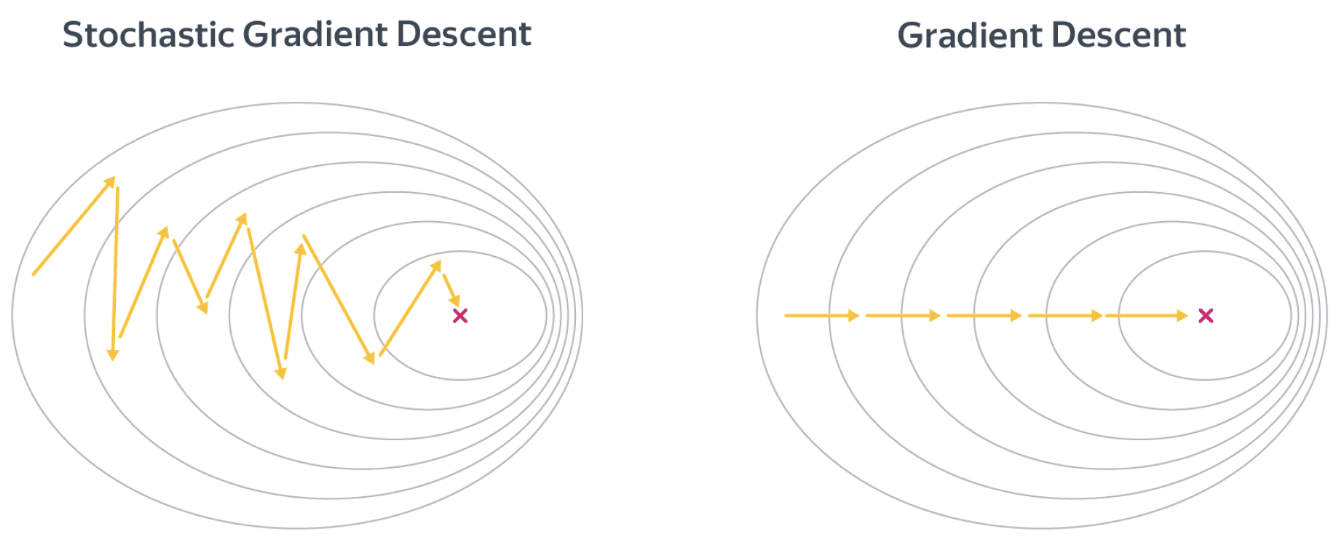


Шаги стохастического градиентного спуска заметно более шумные, но считать их получается значительно быстрее. В итоге они тоже сходятся к оптимальному значению из-за того, что матожидание оценки градиента на батче равно самому градиенту. 

In [30]:
class MyLinearRegression:
    def __init__(self):
        self.theta = None
    
    def fit(self, X, y, n_iterations=1000, learning_rate=0.1):
        m = X.shape[0]
        X_intercept = X.copy()
        X_intercept = np.hstack((np.ones((m, 1)), X_intercept))
        self.theta = np.random.rand(X_intercept.shape[1], 1)
        for iteration in range(n_iterations):
            gradients = (2 / m) * X_intercept.T @ (X_intercept @ self.theta - y)
            self.theta -= learning_rate * gradients
        return self

    
    def predict(self, X):
        m = X.shape[0]
        X_intercept = X.copy()
        X_intercept = np.hstack((np.ones((m, 1)), X_intercept))
        return X_intercept @ self.theta

    def score(self, X, y):
        y_pred = self.predict(X)
        ss_res = ((y - y_pred) ** 2).sum()
        ss_tot = ((y - y.mean()) ** 2).sum()
        return 1 - ss_res / ss_tot

<AxesSubplot:title={'center':'data'}, xlabel='km', ylabel='price'>

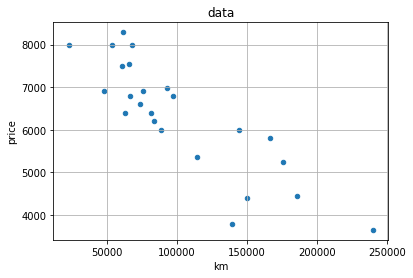

In [31]:
df.plot(kind='scatter', x='km', y='price', grid=True, title='data')

In [32]:
X = df['km'].to_numpy().reshape(-1, 1)
y = df['price'].to_numpy().reshape(-1, 1)

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [34]:
X

array([[1.        ],
       [0.53846366],
       [0.58774948],
       [0.74910295],
       [0.70520633],
       [0.42330989],
       [0.66282974],
       [0.30447119],
       [0.56011257],
       [0.28144044],
       [0.27236171],
       [0.18498763],
       [0.23537893],
       [0.34362347],
       [0.20313587],
       [0.24470638],
       [0.11670144],
       [0.3228958 ],
       [0.17526405],
       [0.19702811],
       [0.1432559 ],
       [0.21004509],
       [0.        ],
       [0.17913321]])

[[ 8008.32159569]
 [-4656.27935666]]


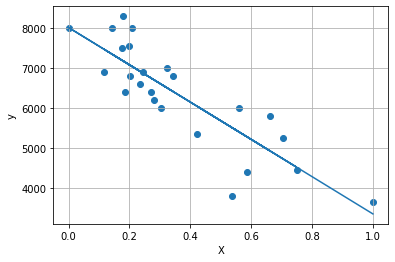

0.7329747045184953


In [35]:
l_model = MyLinearRegression()
l_model.fit(X, y)
y_predicted = l_model.predict(X)

import matplotlib.pyplot as plt

plt.plot(X, y_predicted)
plt.scatter(X, y)
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.show()
print(l_model.score(X, y))
None

In [53]:
class MySGDLinearRegression:
    def __init__(self):
        self.theta = None

    def _next_batch(self, X, y, batch_size):
        for id in range(0, X.shape[0], batch_size):
            yield (X[id: id+batch_size], y[id: id+batch_size])

    def fit(self, X, y, batch_size, n_iterations=10000, learning_rate=0.1):
        m = X.shape[0]
        X_intercept = X.copy()
        X_intercept = np.hstack((np.ones((m, 1)), X_intercept))
        self.theta = np.random.rand(X_intercept.shape[1], 1)
        for iteration in range(n_iterations):
            for x_batch, y_batch in self._next_batch(X_intercept, y, batch_size):
                gradients = (1 / batch_size) * x_batch.T @ (x_batch @ self.theta - y_batch)
                self.theta -= learning_rate * gradients
        return self

    def predict(self, x):
        m = X.shape[0]
        X_intercept = X.copy()
        X_intercept = np.hstack((np.ones((m, 1)), X_intercept))
        return X_intercept @ self.theta

    def score(self, X, y):
        y_pred = self.predict(X)
        ss_res = ((y - y_pred) ** 2).sum()
        ss_tot = ((y - y.mean()) ** 2).sum()
        return 1 - ss_res / ss_tot

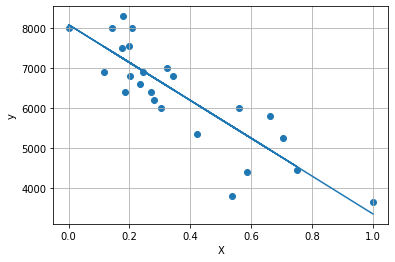

0.7329747045184953


In [58]:
sgd_model = MySGDLinearRegression()
sgd_model.fit(X, y, batch_size=5)
y_predicted_sgd = sgd_model.predict(X)

import matplotlib.pyplot as plt

plt.plot(X, y_predicted_sgd)
plt.scatter(X, y)
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.show()
print(l_model.score(X, y))
None